# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import dataset

In [2]:
dataset = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Data preprocessing

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
print('Number of persons analysed :', dataset.shape[0])
print('Number of factors :', dataset.shape[1])

Number of persons analysed : 253680
Number of factors : 22


## Check data imbalance

In [5]:
print('Number of unique values present to identify diabetes')
print(dataset['Diabetes_012'].value_counts())

Number of unique values present to identify diabetes
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


## Downsampling

In [6]:
downsampled_data = dataset.groupby('Diabetes_012').apply(lambda x: x.sample(4631))

In [7]:
print(downsampled_data)

                     Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  \
Diabetes_012                                                                   
0.0          128298           0.0     1.0       1.0        1.0  34.0     1.0   
             247232           0.0     0.0       1.0        0.0  28.0     0.0   
             126818           0.0     0.0       0.0        1.0  36.0     1.0   
             41296            0.0     0.0       0.0        1.0  24.0     1.0   
             94719            0.0     1.0       0.0        1.0  33.0     0.0   
...                           ...     ...       ...        ...   ...     ...   
2.0          21672            2.0     1.0       0.0        1.0  31.0     0.0   
             43599            2.0     0.0       0.0        1.0  24.0     0.0   
             217349           2.0     1.0       1.0        1.0  25.0     1.0   
             10285            2.0     0.0       0.0        1.0  25.0     1.0   
             208633           2.0     1.

In [8]:
downsampled_data = downsampled_data.reset_index(drop=True)

In [9]:
print(downsampled_data)

       Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0               0.0     1.0       1.0        1.0  34.0     1.0     0.0   
1               0.0     0.0       1.0        0.0  28.0     0.0     0.0   
2               0.0     0.0       0.0        1.0  36.0     1.0     0.0   
3               0.0     0.0       0.0        1.0  24.0     1.0     0.0   
4               0.0     1.0       0.0        1.0  33.0     0.0     0.0   
...             ...     ...       ...        ...   ...     ...     ...   
13888           2.0     1.0       0.0        1.0  31.0     0.0     0.0   
13889           2.0     0.0       0.0        1.0  24.0     0.0     0.0   
13890           2.0     1.0       1.0        1.0  25.0     1.0     1.0   
13891           2.0     0.0       0.0        1.0  25.0     1.0     0.0   
13892           2.0     1.0       1.0        1.0  23.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                       0.0           

In [10]:
print(downsampled_data['Diabetes_012'].value_counts())

Diabetes_012
0.0    4631
1.0    4631
2.0    4631
Name: count, dtype: int64


# Classification

## Data split

In [11]:
X = downsampled_data.iloc[:, 1:]
y = downsampled_data.iloc[:, 0]

In [12]:
print(X)

       HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0         1.0       1.0        1.0  34.0     1.0     0.0   
1         0.0       1.0        0.0  28.0     0.0     0.0   
2         0.0       0.0        1.0  36.0     1.0     0.0   
3         0.0       0.0        1.0  24.0     1.0     0.0   
4         1.0       0.0        1.0  33.0     0.0     0.0   
...       ...       ...        ...   ...     ...     ...   
13888     1.0       0.0        1.0  31.0     0.0     0.0   
13889     0.0       0.0        1.0  24.0     0.0     0.0   
13890     1.0       1.0        1.0  25.0     1.0     1.0   
13891     0.0       0.0        1.0  25.0     1.0     0.0   
13892     1.0       1.0        1.0  23.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
0                       0.0           1.0     1.0      1.0  ...   
1                       0.0           1.0     0.0      1.0  ...   
2                       0.0           1.0     0.0      0.0  ...   
3          

In [13]:
print(y)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
13888    2.0
13889    2.0
13890    2.0
13891    2.0
13892    2.0
Name: Diabetes_012, Length: 13893, dtype: float64


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
print(X_train)

       HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
5753      1.0       1.0        1.0  22.0     1.0     0.0   
9135      0.0       1.0        1.0  28.0     0.0     0.0   
9381      1.0       0.0        1.0  45.0     1.0     0.0   
12965     1.0       1.0        1.0  30.0     1.0     0.0   
6681      1.0       1.0        1.0  29.0     1.0     0.0   
...       ...       ...        ...   ...     ...     ...   
13123     1.0       1.0        1.0  29.0     0.0     0.0   
3264      1.0       0.0        1.0  24.0     0.0     0.0   
9845      1.0       1.0        1.0  25.0     0.0     0.0   
10799     1.0       1.0        1.0  37.0     1.0     0.0   
2732      0.0       0.0        1.0  32.0     1.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
5753                    0.0           1.0     0.0      1.0  ...   
9135                    1.0           1.0     1.0      1.0  ...   
9381                    0.0           1.0     0.0      1.0  ...   
12965      

In [16]:
print(y_train)

5753     1.0
9135     1.0
9381     2.0
12965    2.0
6681     1.0
        ... 
13123    2.0
3264     0.0
9845     2.0
10799    2.0
2732     0.0
Name: Diabetes_012, Length: 11114, dtype: float64


In [17]:
print(X_test)

      HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
2818     0.0       0.0        1.0  35.0     1.0     0.0                   0.0   
9003     1.0       0.0        1.0  35.0     0.0     0.0                   0.0   
6481     1.0       0.0        1.0  27.0     1.0     0.0                   0.0   
5193     1.0       1.0        1.0  36.0     1.0     0.0                   0.0   
7028     0.0       0.0        1.0  26.0     0.0     0.0                   0.0   
...      ...       ...        ...   ...     ...     ...                   ...   
8133     1.0       0.0        1.0  30.0     1.0     0.0                   1.0   
6978     1.0       1.0        1.0  28.0     0.0     0.0                   0.0   
8783     1.0       1.0        1.0  31.0     1.0     0.0                   0.0   
6789     1.0       1.0        1.0  26.0     0.0     0.0                   0.0   
6878     1.0       0.0        1.0  24.0     0.0     0.0                   0.0   

      PhysActivity  Fruits 

In [18]:
print(y_test)

2818    0.0
9003    1.0
6481    1.0
5193    1.0
7028    1.0
       ... 
8133    1.0
6978    1.0
8783    1.0
6789    1.0
6878    1.0
Name: Diabetes_012, Length: 2779, dtype: float64


# KNN classification

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
feature_names = X.columns

# Predict test result

In [21]:
y_pred = classifier.predict(X_test)

# Confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
original_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is', original_accuracy)

[[544 191 149]
 [363 296 266]
 [229 368 373]]
Accuracy is 0.4364879453040662


# Data visualisation

Text(0.5, 1.0, 'Confusion Matrix')

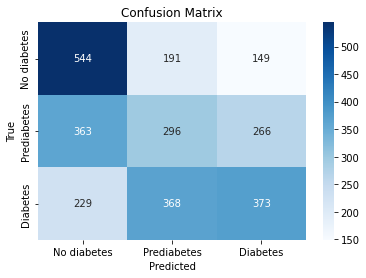

In [28]:
custom_labels = ['No diabetes', 'Prediabetes', 'Diabetes']
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True, xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Feature ranking

In [24]:
feature_importances = []
for feature in range(X.shape[1]):
    X_test_permuted = X_test.copy().to_numpy()  # Convert DataFrame to NumPy array
    np.random.shuffle(X_test_permuted[:, feature])  # Shuffle along rows for the specific feature
    
    # Recreate DataFrame with shuffled values and original feature names
    X_test_permuted = pd.DataFrame(X_test_permuted, columns=feature_names)
    
    permuted_accuracy = accuracy_score(y_test, classifier.predict(X_test_permuted))
    feature_importance = original_accuracy - permuted_accuracy
    feature_importances.append((feature_names[feature], feature_importance))  # Use feature_names[feature] to get the correct column name


In [25]:
feature_importances.sort(key=lambda x: x[1], reverse=True)

In [26]:
for feature, importance in feature_importances:
    print(f"Feature {feature}: Importance {importance}")

Feature BMI: Importance 0.03130622526088522
Feature Age: Importance 0.018711766822598064
Feature MentHlth: Importance 0.009355883411299004
Feature PhysHlth: Importance 0.008276358402303008
Feature HighChol: Importance 0.005037783375314853
Feature Fruits: Importance 0.004677941705649502
Feature PhysActivity: Importance 0.0025188916876573986
Feature Sex: Importance 0.0021590500179921035
Feature DiffWalk: Importance 0.001799208348326753
Feature HighBP: Importance 0.0003598416696653506
Feature CholCheck: Importance 0.0003598416696653506
Feature HvyAlcoholConsump: Importance 0.0003598416696653506
Feature AnyHealthcare: Importance 0.0
Feature Income: Importance -0.0007196833393307012
Feature Smoker: Importance -0.0014393666786614023
Feature Stroke: Importance -0.0014393666786614023
Feature HeartDiseaseorAttack: Importance -0.0014393666786614023
Feature GenHlth: Importance -0.0014393666786614023
Feature NoDocbcCost: Importance -0.0021590500179921035
Feature Veggies: Importance -0.006836991723

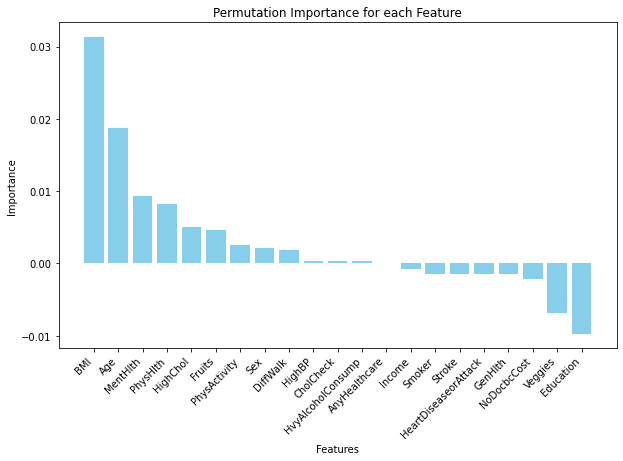

In [27]:
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Extract sorted feature names and importances
sorted_feature_names = [feature for feature, _ in feature_importances]
sorted_importances = [importance for _, importance in feature_importances]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Permutation Importance for each Feature')
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better visibility
plt.show()